In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sym.symbols('x')
x0, x1 = 0, 10
C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14 = sym.symbols('C_1 C_2 C_3 C_4 C_5 C_6 C_7 C_8 C_9 C_10 C_11 C_12 C_13 C_14')
q = 8 - 0.8 * x
F = 25
EI = 1500
H = 400
qc, qb = sym.symbols('q_c q_b')

w = sym.Function('w')(x)

ODEc = sym.Eq(-H * sym.diff(w, x, 2), qc)
ODEb = sym.Eq(EI * sym.diff(w, x, 4), qb)

wc = sym.dsolve(ODEc).subs({'C1': C5, 'C2': C6}).rhs
Vc = H * sym.diff(wc, x)
wb = sym.dsolve(ODEb).subs({'C1': C7, 'C2': C8, 'C3': C9, 'C4': C10}).rhs
ob = -sym.diff(wb, x)
Mb = EI * sym.diff(ob, x)
Vb = sym.diff(Mb, x)
display(wb)

eq1 = sym.Eq(wc.subs(x,x0),0)
eq2 = sym.Eq(wc.subs(x,x1),0)
eq3 = sym.Eq(wb.subs(x,x0),0)
eq4 = sym.Eq(ob.subs(x,x0),0)
eq5 = sym.Eq(wb.subs(x,x1),0)
eq6 = sym.Eq(Mb.subs(x,x1),0)
eq7 = sym.Eq(q-qc-qb,0)
eq8 = sym.Eq(wc-wb,0)
sol = sym.solve((eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8),(C5,C6,C7,C8,C9,C10,qc,qb))

C_10*x**3 + C_7 + C_8*x + C_9*x**2 + q_b*x**4/36000

-x**2*(-4.0*x**3 + 100.0*x**2 - 600.0*x)/(800*(5.0*x**2 - 75.0*x - 225.0)) + x*(-x**3 + 25.0*x**2 - 150.0*x)/(100.0*x**2 - 1500.0*x - 4500.0)

x**4*(36.0*x - 360.0)/(36000*(x**2 - 15.0*x - 45.0)) + x**3*(10.0 - x)/(40.0*x**2 - 600.0*x - 1800.0) + x**2*(3.0*x - 30.0)/(20.0*x**2 - 300.0*x - 900.0)

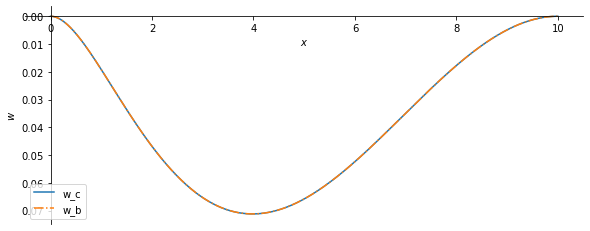

In [3]:
x_np = np.linspace(x0,x1,10000)

wc_np = sym.lambdify(x, wc.subs(sol))
display(wc.subs(sol))
wb_np = sym.lambdify(x, wb.subs(sol))
display(wb.subs(sol))

plt.figure(figsize=(10,4))
plt.plot(x_np,wc_np(x_np), label=f'w_c')
plt.plot(x_np,wb_np(x_np), '-.', label=f'w_b')
plt.xlabel('$x$')
plt.ylabel('$w$')
plt.legend();
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

(-4.0*x**3 + 100.0*x**2 - 600.0*x)/(5.0*x**2 - 75.0*x - 225.0)

(36.0*x - 360.0)/(x**2 - 15.0*x - 45.0)

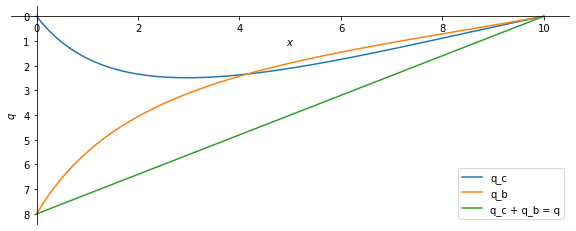

In [4]:
qc_np = sym.lambdify(x, qc.subs(sol))
qb_np = sym.lambdify(x, qb.subs(sol))

display(qc.subs(sol))
display(qb.subs(sol))

plt.figure(figsize=(10,4))
plt.plot(x_np,qc_np(x_np), label=f'q_c')
plt.plot(x_np,qb_np(x_np), label=f'q_b')
plt.plot(x_np,qc_np(x_np)+qb_np(x_np), label=f'q_c + q_b = q')
plt.xlabel('$x$')
plt.ylabel('$q$')
plt.legend();
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()